In [1]:
import numpy as np

import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
	OneHotEncoder,
	OrdinalEncoder,
	StandardScaler,
	MinMaxScaler,
	PowerTransformer,
	FunctionTransformer
)
!pip install feature-engine
from feature_engine.outliers import Winsorizer
from feature_engine.datetime import DatetimeFeatures
from feature_engine.selection import SelectBySingleFeaturePerformance
from feature_engine.encoding import (
	RareLabelEncoder,
	MeanEncoder,
	CountFrequencyEncoder
)

import matplotlib.pyplot as plt

import warnings

In [2]:
# Display Settings

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
sklearn.set_config(transform_output="pandas")

In [5]:
warnings.filterwarnings("ignore")

In [6]:
path = r"C:\Users\User\Desktop\Learnabay Training\My Portfolio projects for resume\Flight Price Prediction\Data\train.csv"

train = pd.read_csv(path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-27,Delhi,Cochin,20:55:00,12:35:00,940,1,In-flight meal not included,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,18:55:00,16:20:00,1285,1,No Info,13044
2,Air India,2019-05-18,Delhi,Cochin,09:45:00,09:25:00,1420,2,No Info,10975
3,Indigo,2019-06-03,Mumbai,Hyderabad,21:20:00,22:50:00,90,0,No Info,2227
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,02:55:00,04:20:00,85,0,No Info,5678
...,...,...,...,...,...,...,...,...,...,...
6689,Spicejet,2019-06-09,Kolkata,Banglore,11:35:00,18:50:00,435,1,No Info,8479
6690,Multiple Carriers,2019-05-09,Delhi,Cochin,10:00:00,01:30:00,930,1,No Info,15078
6691,Air India,2019-05-18,Delhi,Cochin,12:00:00,07:40:00,1180,2,No Info,8603
6692,Air Asia,2019-05-18,Delhi,Cochin,07:55:00,13:25:00,330,1,No Info,8759


In [7]:
X_train = train.drop(columns="price")
y_train = train.price.copy()

# Column wise transformation operations

## Airline

In [12]:
air_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)),
	("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

air_transformer.fit_transform(X_train.loc[:, ["airline"]])


,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
6689,0.0,0.0,0.0,0.0,1.0
6690,0.0,0.0,0.0,1.0,0.0
6691,1.0,0.0,0.0,0.0,0.0
6692,0.0,0.0,0.0,0.0,1.0


## Date of Journey

In [14]:
feature_to_extract = ["year", "month", "week", "day_of_week","day_of_month","weekend", "day_of_year","month_start","month_end", "quarter"]

doj_transformer = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=feature_to_extract, yearfirst=True, format="mixed")),
	("scaler", MinMaxScaler())
])

doj_transformer.fit_transform(X_train.loc[:, ["date_of_journey"]])

,date_of_journey_year,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_month,date_of_journey_weekend,date_of_journey_day_of_year,date_of_journey_month_start,date_of_journey_month_end,date_of_journey_quarter
0,0.0,0.666667,0.764706,0.000000,1.000000,0.0,0.737288,0.0,0.0,1.0
1,0.0,1.000000,0.882353,0.333333,0.423077,0.0,0.872881,0.0,0.0,1.0
2,0.0,0.666667,0.647059,0.833333,0.653846,1.0,0.661017,0.0,0.0,1.0
3,0.0,1.000000,0.823529,0.000000,0.076923,0.0,0.796610,0.0,0.0,1.0
4,0.0,0.333333,0.294118,0.000000,0.000000,0.0,0.262712,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6689,0.0,1.000000,0.823529,1.000000,0.307692,1.0,0.847458,0.0,0.0,1.0
6690,0.0,0.666667,0.588235,0.500000,0.307692,0.0,0.584746,0.0,0.0,1.0
6691,0.0,0.666667,0.647059,0.833333,0.653846,1.0,0.661017,0.0,0.0,1.0
6692,0.0,0.666667,0.647059,0.833333,0.653846,1.0,0.661017,0.0,0.0,1.0


## Source and Destination

In [15]:
location_subset = X_train.loc[:, ["source", "destination"]]
location_subset

,source,destination
0,Delhi,Cochin
1,Kolkata,Banglore
2,Delhi,Cochin
3,Mumbai,Hyderabad
4,Mumbai,Hyderabad
...,...,...
6689,Kolkata,Banglore
6690,Delhi,Cochin
6691,Delhi,Cochin
6692,Delhi,Cochin


In [16]:
location_pipe1 = Pipeline(steps=[
	("encoder", MeanEncoder()),
	("scaler", PowerTransformer())
])

location_pipe1.fit_transform(location_subset, y_train)

,source,destination
0,1.040160,1.040160
1,-0.190259,-0.190259
2,1.040160,1.040160
3,-1.907352,-1.907352
4,-1.907352,-1.907352
...,...,...
6689,-0.190259,-0.190259
6690,1.040160,1.040160
6691,1.040160,1.040160
6692,1.040160,1.040160


In [17]:
np.union1d(
	X_train.source.unique(),
	X_train.destination.unique()
)

array(['Banglore', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'Mumbai'], dtype=object)

In [18]:
def is_south(X):
	columns = X.columns.to_list()
	south_cities = ['Banglore', 'Chennai', 'Cochin', 'Hyderabad']
	return (
		X
		.assign(**{
			f"{col}_is_south": X.loc[:, col].isin(south_cities).astype(int)
			for col in columns
		})
		.drop(columns=columns)
	)


FunctionTransformer(func=is_south).fit_transform(location_subset)

,source_is_south,destination_is_south
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
6689,0,1
6690,0,1
6691,0,1
6692,0,1


In [20]:
location_transformer = FeatureUnion(transformer_list=[
	("part1", location_pipe1),
	("part2", FunctionTransformer(func=is_south))
])

location_transformer.fit_transform(location_subset, y_train)

,source,destination,source_is_south,destination_is_south
0,1.040160,1.040160,0,1
1,-0.190259,-0.190259,0,1
2,1.040160,1.040160,0,1
3,-1.907352,-1.907352,0,1
4,-1.907352,-1.907352,0,1
...,...,...,...,...
6689,-0.190259,-0.190259,0,1
6690,1.040160,1.040160,0,1
6691,1.040160,1.040160,0,1
6692,1.040160,1.040160,0,1


## Departure and Arrival Time

In [21]:
time_subset = X_train.loc[:, ["dep_time", "arrival_time"]]
time_subset

,dep_time,arrival_time
0,20:55:00,12:35:00
1,18:55:00,16:20:00
2,09:45:00,09:25:00
3,21:20:00,22:50:00
4,02:55:00,04:20:00
...,...,...
6689,11:35:00,18:50:00
6690,10:00:00,01:30:00
6691,12:00:00,07:40:00
6692,07:55:00,13:25:00


In [22]:
time_pipe1 = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=["hour", "minute"])),
	("scaler", MinMaxScaler())
])

time_pipe1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.869565,1.000000,0.521739,0.636364
1,0.782609,1.000000,0.695652,0.363636
2,0.391304,0.818182,0.391304,0.454545
3,0.913043,0.363636,0.956522,0.909091
4,0.086957,1.000000,0.173913,0.363636
...,...,...,...,...
6689,0.478261,0.636364,0.782609,0.909091
6690,0.434783,0.000000,0.043478,0.545455
6691,0.521739,0.000000,0.304348,0.727273
6692,0.304348,1.000000,0.565217,0.454545


In [23]:
def part_of_day(X, morning=4, noon=12, eve=16, night=20):
	columns = X.columns.to_list()
	X_temp = X.assign(**{
		col: pd.to_datetime(X.loc[:, col]).dt.hour
		for col in columns
	})

	return (
		X_temp
		.assign(**{
			f"{col}_part_of_day": np.select(
				[X_temp.loc[:, col].between(morning, noon, inclusive="left"),
				 X_temp.loc[:, col].between(noon, eve, inclusive="left"),
				 X_temp.loc[:, col].between(eve, night, inclusive="left")],
				["morning", "afternoon", "evening"],
				default="night"
			)
			for col in columns
		})
		.drop(columns=columns)
	)

FunctionTransformer(func=part_of_day).fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,night,afternoon
1,evening,evening
2,morning,morning
3,night,night
4,night,morning
...,...,...
6689,morning,evening
6690,morning,night
6691,afternoon,morning
6692,morning,afternoon


In [24]:
time_pipe2 = Pipeline(steps=[
	("part", FunctionTransformer(func=part_of_day)),
	("encoder", CountFrequencyEncoder()),
	("scaler", MinMaxScaler())
])

time_pipe2.fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,0.159827,0.000000
1,0.195680,0.699256
2,1.000000,0.968119
3,0.159827,1.000000
4,0.159827,0.968119
...,...,...
6689,1.000000,0.699256
6690,1.000000,1.000000
6691,0.000000,0.968119
6692,1.000000,0.000000


In [25]:
time_transformer = FeatureUnion(transformer_list=[
	("part1", time_pipe1),
	("part2", time_pipe2)
])

time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.869565,1.000000,0.521739,0.636364,0.159827,0.000000
1,0.782609,1.000000,0.695652,0.363636,0.195680,0.699256
2,0.391304,0.818182,0.391304,0.454545,1.000000,0.968119
3,0.913043,0.363636,0.956522,0.909091,0.159827,1.000000
4,0.086957,1.000000,0.173913,0.363636,0.159827,0.968119
...,...,...,...,...,...,...
6689,0.478261,0.636364,0.782609,0.909091,1.000000,0.699256
6690,0.434783,0.000000,0.043478,0.545455,1.000000,1.000000
6691,0.521739,0.000000,0.304348,0.727273,0.000000,0.968119
6692,0.304348,1.000000,0.565217,0.454545,1.000000,0.000000


## Duration

In [26]:
(
	X_train
	.duration
	.quantile([0.25, 0.5, 0.75])
	.values
	.reshape(-1, 1)
	# .shape
)

array([[170.],
       [515.],
       [925.]])

In [27]:
class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
	def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
		self.variables = variables
		self.percentiles = percentiles
		self.gamma = gamma


	def fit(self, X, y=None):
		if not self.variables:
			self.variables = X.select_dtypes(include="number").columns.to_list()

		self.reference_values_ = {
			col: (
				X
				.loc[:, col]
				.quantile(self.percentiles)
				.values
				.reshape(-1, 1)
			)
			for col in self.variables
		}

		return self


	def transform(self, X):
		objects = []
		for col in self.variables:
			columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
			obj = pd.DataFrame(
				data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
				columns=columns
			)
			objects.append(obj)
		return pd.concat(objects, axis=1)

In [28]:
RBFPercentileSimilarity(percentiles=[0.25,0.5,0.75]).fit_transform(X_train)

,duration_rbf_25,duration_rbf_50,duration_rbf_75,total_stops_rbf_25,total_stops_rbf_50,total_stops_rbf_75
0,0.000000e+00,0.000000e+00,1.691898e-10,0.904837,1.000000,1.000000
1,0.000000e+00,0.000000e+00,0.000000e+00,0.904837,1.000000,1.000000
2,0.000000e+00,0.000000e+00,0.000000e+00,0.670320,0.904837,0.904837
3,1.125982e-278,0.000000e+00,0.000000e+00,1.000000,0.904837,0.904837
4,1.668157e-314,0.000000e+00,0.000000e+00,1.000000,0.904837,0.904837
...,...,...,...,...,...,...
6689,0.000000e+00,1.125982e-278,0.000000e+00,0.904837,1.000000,1.000000
6690,0.000000e+00,0.000000e+00,8.208500e-02,0.904837,1.000000,1.000000
6691,0.000000e+00,0.000000e+00,0.000000e+00,0.670320,0.904837,0.904837
6692,0.000000e+00,0.000000e+00,0.000000e+00,0.904837,1.000000,1.000000


In [29]:
def duration_category(X, short=180, med=400):
	return (
		X
		.assign(duration_cat=np.select([X.duration.lt(short),
									    X.duration.between(short, med, inclusive="left")],
									   ["short", "medium"],
									   default="long"))
		.drop(columns="duration")
	)

In [31]:
def is_over(X, value=1000):
	return (
		X
		.assign(**{
			f"duration_over_{value}": X.duration.ge(value).astype(int)
		})
		.drop(columns="duration")
	)

In [32]:
duration_pipe1 = Pipeline(steps=[
	("rbf", RBFPercentileSimilarity()),
	("scaler", PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
	("cat", FunctionTransformer(func=duration_category)),
	("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
	("part1", duration_pipe1),
	("part2", duration_pipe2),
	("part3", FunctionTransformer(func=is_over)),
	("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
	("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
	("imputer", SimpleImputer(strategy="median")),
	("union", duration_union)
])

duration_transformer.fit_transform(X_train.loc[:, ["duration"]])

,duration_rbf_25,duration_rbf_50,duration_rbf_75,duration_cat,duration_over_1000,duration
0,-0.353152,-0.119075,-0.099367,2.0,0,0.609935
1,-0.353152,-0.119075,-0.099368,2.0,1,1.301752
2,-0.353152,-0.119075,-0.099368,2.0,1,1.572463
3,-0.353152,-0.119075,-0.099368,0.0,0,-1.094542
4,-0.353152,-0.119075,-0.099368,0.0,0,-1.104568
...,...,...,...,...,...,...
6689,-0.353152,-0.119075,-0.099368,2.0,0,-0.402725
6690,-0.353152,-0.119075,10.098457,2.0,0,0.589882
6691,-0.353152,-0.119075,-0.099368,2.0,1,1.091199
6692,-0.353152,-0.119075,-0.099368,1.0,0,-0.613278


## Total Stops

In [33]:
def is_direct(X):
	return X.assign(is_direct_flight=X.total_stops.eq(0).astype(int))


total_stops_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("", FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(X_train.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,1,0
1,1,0
2,2,0
3,0,1
4,0,1
...,...,...
6689,1,0
6690,1,0
6691,2,0
6692,1,0


## Additional Info

In [34]:
info_pipe1 = Pipeline(steps=[
	("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
	("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
6689,0.0,1.0,0.0
6690,0.0,1.0,0.0
6691,0.0,1.0,0.0
6692,0.0,1.0,0.0


In [35]:
def have_info(X):
	return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))

In [36]:
info_union = FeatureUnion(transformer_list=[
	("part1", info_pipe1),
	("part2", FunctionTransformer(func=have_info))
])

In [37]:
info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

info_transformer.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other,additional_info
0,1.0,0.0,0.0,1
1,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0
4,0.0,1.0,0.0,0
...,...,...,...,...
6689,0.0,1.0,0.0,0
6690,0.0,1.0,0.0,0
6691,0.0,1.0,0.0,0
6692,0.0,1.0,0.0,0


# Column Transformer

In [38]:
column_transformer = ColumnTransformer(transformers=[
	("air", air_transformer, ["airline"]),
	("doj", doj_transformer, ["date_of_journey"]),
	("location", location_transformer, ["source", 'destination']),
	("time", time_transformer, ["dep_time", "arrival_time"]),
	("dur", duration_transformer, ["duration"]),
	("stops", total_stops_transformer, ["total_stops"]),
	("info", info_transformer, ["additional_info"])
], remainder="passthrough")

column_transformer.fit_transform(X_train, y_train)

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Other,doj__date_of_journey_year,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_month,doj__date_of_journey_weekend,doj__date_of_journey_day_of_year,doj__date_of_journey_month_start,doj__date_of_journey_month_end,doj__date_of_journey_quarter,location__source,location__destination,location__source_is_south,location__destination_is_south,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,dur__duration_rbf_25,dur__duration_rbf_50,dur__duration_rbf_75,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_Other,info__additional_info
0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.764706,0.000000,1.000000,0.0,0.737288,0.0,0.0,1.0,1.040160,1.040160,0,1,0.869565,1.000000,0.521739,0.636364,0.159827,0.000000,-0.353152,-0.119075,-0.099367,2.0,0,0.609935,1,0,1.0,0.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,0.882353,0.333333,0.423077,0.0,0.872881,0.0,0.0,1.0,-0.190259,-0.190259,0,1,0.782609,1.000000,0.695652,0.363636,0.195680,0.699256,-0.353152,-0.119075,-0.099368,2.0,1,1.301752,1,0,0.0,1.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.647059,0.833333,0.653846,1.0,0.661017,0.0,0.0,1.0,1.040160,1.040160,0,1,0.391304,0.818182,0.391304,0.454545,1.000000,0.968119,-0.353152,-0.119075,-0.099368,2.0,1,1.572463,2,0,0.0,1.0,0.0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.823529,0.000000,0.076923,0.0,0.796610,0.0,0.0,1.0,-1.907352,-1.907352,0,1,0.913043,0.363636,0.956522,0.909091,0.159827,1.000000,-0.353152,-0.119075,-0.099368,0.0,0,-1.094542,0,1,0.0,1.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.294118,0.000000,0.000000,0.0,0.262712,1.0,0.0,1.0,-1.907352,-1.907352,0,1,0.086957,1.000000,0.173913,0.363636,0.159827,0.968119,-0.353152,-0.119075,-0.099368,0.0,0,-1.104568,0,1,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.823529,1.000000,0.307692,1.0,0.847458,0.0,0.0,1.0,-0.190259,-0.190259,0,1,0.478261,0.636364,0.782609,0.909091,1.000000,0.699256,-0.353152,-0.119075,-0.099368,2.0,0,-0.402725,1,0,0.0,1.0,0.0,0
6690,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.588235,0.500000,0.307692,0.0,0.584746,0.0,0.0,1.0,1.040160,1.040160,0,1,0.434783,0.000000,0.043478,0.545455,1.000000,1.000000,-0.353152,-0.119075,10.098457,2.0,0,0.589882,1,0,0.0,1.0,0.0,0
6691,1.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.647059,0.833333,0.653846,1.0,0.661017,0.0,0.0,1.0,1.040160,1.040160,0,1,0.521739,0.000000,0.304348,0.727273,0.000000,0.968119,-0.353152,-0.119075,-0.099368,2.0,1,1.091199,2,0,0.0,1.0,0.0,0
6692,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,0.647059,0.833333,0.653846,1.0,0.661017,0.0,0.0,1.0,1.040160,1.040160,0,1,0.304348,1.000000,0.565217,0.454545,1.000000,0.000000,-0.353152,-0.119075,-0.099368,1.0,0,-0.613278,1,0,0.0,1.0,0.0,0


## Feature Selection

In [39]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
	estimator=estimator,
	scoring="r2",
	threshold=0.1
) 

## Combining the Transformer and the feature selector

In [40]:
preprocessor = Pipeline(steps=[
	("ct", column_transformer),
	("selector", selector)
])

preprocessor.fit_transform(X_train, y_train)

,air__airline_Indigo,air__airline_Jet Airways,air__airline_Other,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,location__destination,dur__duration_rbf_25,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight
0,0.0,1.0,0.0,0.764706,0.737288,1.040160,1.040160,-0.353152,2.0,0,0.609935,1,0
1,0.0,1.0,0.0,0.882353,0.872881,-0.190259,-0.190259,-0.353152,2.0,1,1.301752,1,0
2,0.0,0.0,0.0,0.647059,0.661017,1.040160,1.040160,-0.353152,2.0,1,1.572463,2,0
3,1.0,0.0,0.0,0.823529,0.796610,-1.907352,-1.907352,-0.353152,0.0,0,-1.094542,0,1
4,0.0,1.0,0.0,0.294118,0.262712,-1.907352,-1.907352,-0.353152,0.0,0,-1.104568,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6689,0.0,0.0,1.0,0.823529,0.847458,-0.190259,-0.190259,-0.353152,2.0,0,-0.402725,1,0
6690,0.0,0.0,0.0,0.588235,0.584746,1.040160,1.040160,-0.353152,2.0,0,0.589882,1,0
6691,0.0,0.0,0.0,0.647059,0.661017,1.040160,1.040160,-0.353152,2.0,1,1.091199,2,0
6692,0.0,0.0,1.0,0.647059,0.661017,1.040160,1.040160,-0.353152,1.0,0,-0.613278,1,0


In [ ]:
## Feature Importance Visualization

In [41]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'air__airline_Air India': 0.0018566166864114237,
 'air__airline_Indigo': 0.12503390730273556,
 'air__airline_Jet Airways': 0.1821337127283891,
 'air__airline_Multiple Carriers': 0.018606960583504344,
 'air__airline_Other': 0.11323269369591875,
 'doj__date_of_journey_year': -0.0004305150008283576,
 'doj__date_of_journey_month': 0.0812870080325477,
 'doj__date_of_journey_week': 0.17136121485343714,
 'doj__date_of_journey_day_of_week': 0.0003741447761493137,
 'doj__date_of_journey_day_of_month': 0.029625356177875723,
 'doj__date_of_journey_weekend': -0.00027812722488129715,
 'doj__date_of_journey_day_of_year': 0.2102901279675218,
 'doj__date_of_journey_month_start': 0.00932879858219604,
 'doj__date_of_journey_month_end': -0.0004305150008283576,
 'doj__date_of_journey_quarter': 0.040535500533498824,
 'location__source': 0.1257139940308999,
 'location__destination': 0.1257139940308999,
 'location__source_is_south': 0.02805586604300292,
 'location__destination_is_south': 0.02805586604300292

In [42]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'info__additional_info_No Info': -0.0005822444075102388,
 'info__additional_info': -0.0005822444075102388,
 'time__dep_time_part_of_day': -0.00057196039840172,
 'doj__date_of_journey_year': -0.0004305150008283576,
 'doj__date_of_journey_month_end': -0.0004305150008283576,
 'doj__date_of_journey_weekend': -0.00027812722488129715,
 'dur__duration_rbf_75': 1.644002138075547e-05,
 'doj__date_of_journey_day_of_week': 0.0003741447761493137,
 'info__additional_info_In-flight meal not included': 0.001739383790001492,
 'air__airline_Air India': 0.0018566166864114237,
 'dur__duration_rbf_50': 0.004638982269091947,
 'time__dep_time_hour': 0.008700429329426865,
 'doj__date_of_journey_month_start': 0.00932879858219604,
 'info__additional_info_Other': 0.01810846712656211,
 'air__airline_Multiple Carriers': 0.018606960583504344,
 'location__source_is_south': 0.02805586604300292,
 'location__destination_is_south': 0.02805586604300292,
 'doj__date_of_journey_day_of_month': 0.029625356177875723,
 'time

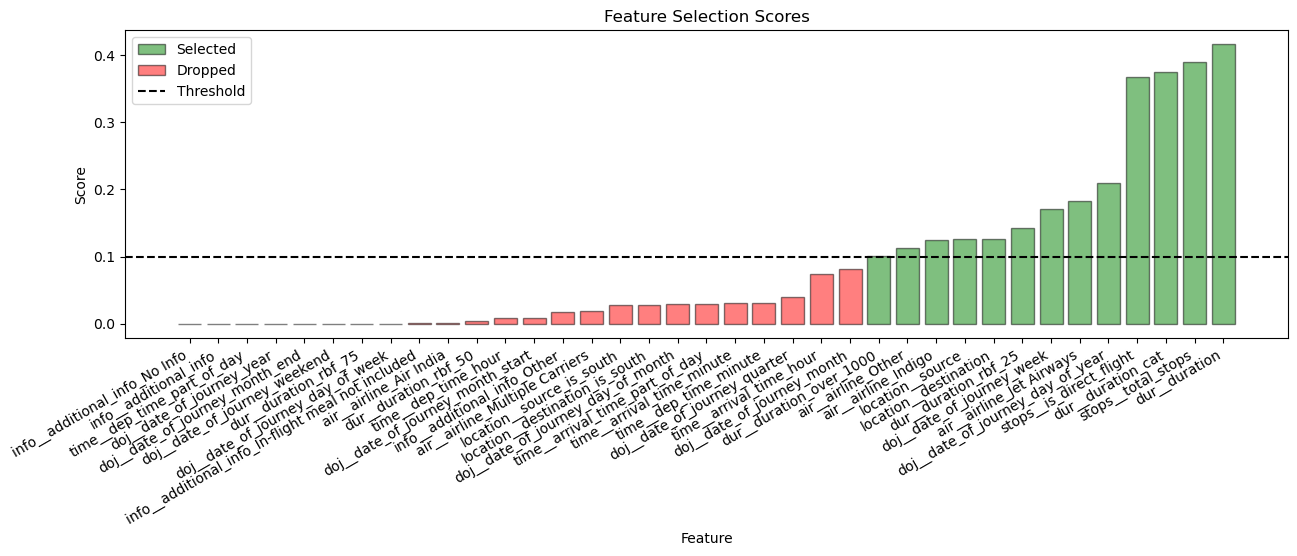

In [43]:
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
	params = dict(
		x=i,
		height=score,
		edgecolor="black",
		alpha=0.5
	)
	
	if score < THRESHOLD:
		bar = ax.bar(
			color="red",
			**params
		)
		if not dropped_bar:
			dropped_bar = bar[0]
	else:
		bar = ax.bar(
			color="green",
			**params
		)
		if not selected_bar:
			selected_bar = bar[0]

thresh_line = ax.axhline(
	y=0.1,
	color="black",
	linestyle="--"
)

ax.set_xticks(
	ticks=range(len(sorted_feat_imp)),
	labels=list(sorted_feat_imp.keys()),
	rotation=30,
	ha="right"
)
ax.set(
	xlabel="Feature",
	ylabel="Score",
	title="Feature Selection Scores"
)

ax.legend(
	handles=[selected_bar, dropped_bar, thresh_line],
	labels=["Selected", "Dropped", "Threshold"],
	loc="upper left"
)

plt.show()

### The dataset went upto 31 columns after Feature Engineering
### The Feature Selection algorithm selected 13 features out of that